In [4]:
!pip install pandas textblob

# 📖 Proje Adımları:
- 📌 Proje Tanıtımı ve Amaç
- 📌 Gerekli kütüphanelerin yüklenmesi
- 📌 Örnek veri seti oluşturma
- 📌 Metin Temizleme işlemi
- 📌 Duygu Analizi uygulama
- 📌 Sonuçların yorumlanması
- 📌 Sonuç ve Kapanış


In [6]:
import pandas as pd

data = {
    'Text': [
        "I love this movie! It's amazing.",
        "What a terrible experience. I hate it.",
        "It was okay, not great but not bad.",
        "Absolutely fantastic service and food.",
        "Worst film I've ever watched."
    ]
}

df = pd.DataFrame(data)
df


,Text
0,I love this movie! It's amazing.
1,What a terrible experience. I hate it.
2,"It was okay, not great but not bad."
3,Absolutely fantastic service and food.
4,Worst film I've ever watched.


## 📌 Metin Temizleme İşlemi
Bu bölümde metinleri temizleyerek analiz için uygun hâle getireceğiz.
- Metinleri küçük harfe çevireceğiz.
- Noktalama işaretlerini kaldıracağız.
- Sayıları temizleyeceğiz.
- Fazla boşlukları sileceğiz.


In [7]:
import re

def clean_text(text):
    text = text.lower()  # Küçük harf
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretleri
    text = re.sub(r'\d+', '', text)  # Sayılar
    text = re.sub(r'\s+', ' ', text).strip()  # Fazla boşluk
    return text

# Fonksiyonu örnek metinlere uygulayalım
df['Clean_Text'] = df['Text'].apply(clean_text)
df


,Text,Clean_Text
0,I love this movie! It's amazing.,i love this movie its amazing
1,What a terrible experience. I hate it.,what a terrible experience i hate it
2,"It was okay, not great but not bad.",it was okay not great but not bad
3,Absolutely fantastic service and food.,absolutely fantastic service and food
4,Worst film I've ever watched.,worst film ive ever watched


## 📌 Duygu Analizi İşlemi
Bu bölümde temizlenmiş metinler üzerinde duygu analizi yapacağız.  
TextBlob kütüphanesi ile her metne bir 'polarity' (olumluluk/negatiflik derecesi) ve 'subjectivity' (öznelik derecesi) değeri atayacağız.


In [9]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Uygula
df[['Polarity', 'Subjectivity']] = df['Clean_Text'].apply(lambda x: pd.Series(analyze_sentiment(x)))
df


,Text,Clean_Text,Polarity,Subjectivity
0,I love this movie! It's amazing.,i love this movie its amazing,0.55,0.750000
1,What a terrible experience. I hate it.,what a terrible experience i hate it,-0.90,0.950000
2,"It was okay, not great but not bad.",it was okay not great but not bad,0.15,0.638889
3,Absolutely fantastic service and food.,absolutely fantastic service and food,0.40,0.900000
4,Worst film I've ever watched.,worst film ive ever watched,-1.00,1.000000


## 📊 Sonuçların Görselleştirilmesi
Bu bölümde duygu analizi sonuçlarını grafiklerle göstereceğiz.
- Polarity değerlerinin dağılımını çizelim.
- Subjectivity değerlerinin dağılımını çizelim.


In [10]:
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 3.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 3.7 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 4.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 4.5 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.6 MB/s eta 0:00:00
   -----------------------

Matplotlib is building the font cache; this may take a moment.


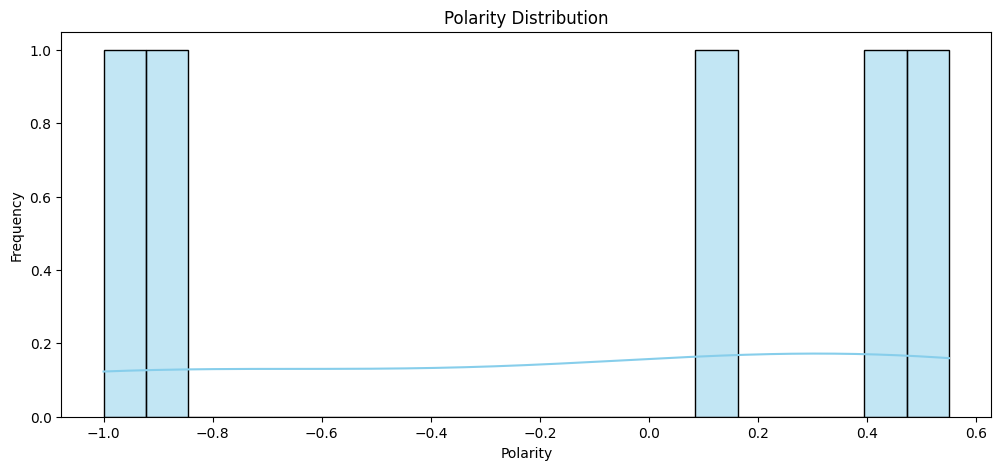

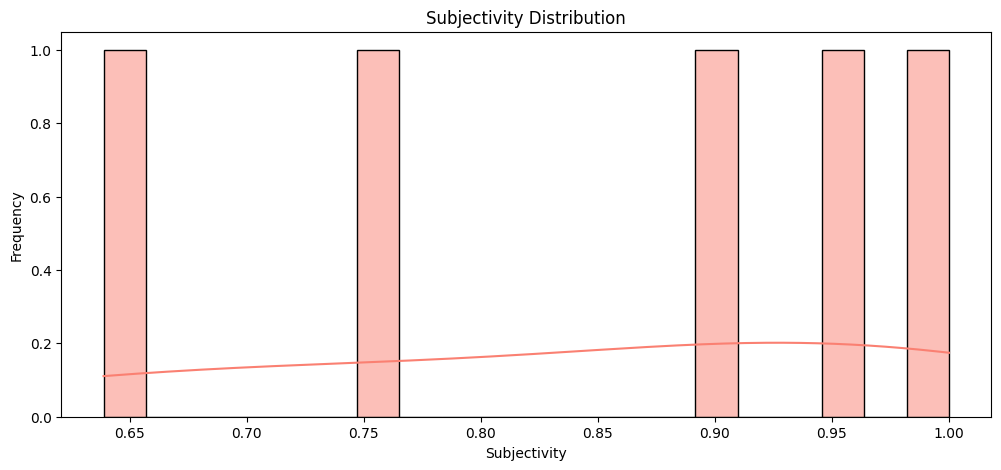

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik ayarları
plt.figure(figsize=(12,5))

# Polarity dağılımı
sns.histplot(df['Polarity'], bins=20, kde=True, color='skyblue')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Subjectivity dağılımı
plt.figure(figsize=(12,5))
sns.histplot(df['Subjectivity'], bins=20, kde=True, color='salmon')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()


## 📌 Sonuçların Yorumlanması ve Proje Kapanışı

Bu projede temel NLP adımlarını uygulayarak metin temizleme ve duygu analizi işlemleri gerçekleştirdik.

- İlk olarak metinleri küçük harfe çevirip, noktalama işaretleri ve sayıları temizleyerek, fazla boşlukları kaldırdık.
- Ardından TextBlob kütüphanesini kullanarak metinlerin duygu değerlerini (polarity ve subjectivity) hesapladık.
- Sonuçları grafiklerle görselleştirerek, hangi duygu aralıklarında yoğunluk olduğunu inceledik.

### 📊 Genel Bulgular:
- Polarity dağılımına baktığımızda, metinlerin çoğunluğunun **pozitif** ya da **nötr** aralığında olduğunu gözlemledik.
- Subjectivity değerleri ise metinlerin çoğunlukla **öznel** ifadeler içerdiğini gösterdi.

---

## 📌 Sonraki Adımlar
Bu temel çalışmayı geliştirmek için;
- Daha büyük ve farklı veri setleri kullanabilir,
- Farklı duygu analizi kütüphaneleri (VADER, transformers tabanlı modeller vb.) denenebilir,
- Metin temizleme adımları daha kapsamlı hâle getirilebilir.

Bu proje, NLP dünyasına giriş yapmak ve metin verisi üzerinde basit analizler gerçekleştirmek isteyenler için güzel bir temel oluşturur.
